In [1]:
#%%file fine_tune_all.py
# Fine tune.
import os
import caffe
import numpy as np
import time
import cPickle
from pylab import *
%matplotlib inline

net_name = 'all'

imagenet_root = '/home/haow3/occlusion-project/data/imagenet/'
caffe_root = '/home/haow3/software/caffe-rc3/'

plt.rcParams['figure.figsize'] = (20, 20)

niter = 10000
# Losses will also be stored in the log.
train_loss = np.zeros(niter)
test_accuracy = {}

caffe.set_device(0)
caffe.set_mode_gpu()
solver = caffe.SGDSolver(imagenet_root + 'model/finetune_alexnet_{}/solver.prototxt'.format(net_name))
solver.net.copy_from(imagenet_root + 'model/bvlc_alexnet/bvlc_alexnet.caffemodel')

start_time = time.time()
# We run the solver for niter times, and record the training loss.
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    train_loss[it] = solver.net.blobs['loss'].data
    now_time = time.strftime("%H:%M:%S", time.gmtime(int(time.time() - start_time)))
    if it % 10 == 0 and it % 100 != 0:
        print '[{}] iter{:6} | train_loss={:10.6f}'.format(now_time, it, float(train_loss[it]))
    if it % 100 == 0:
        test_iters = 10
        accuracy = 0
        for i in arange(test_iters):
            solver.test_nets[0].forward()
            accuracy += solver.test_nets[0].blobs['accuracy'].data
        accuracy /= test_iters
        test_accuracy[it] = accuracy
        print '[{}] iter{:6} | train_loss={:10.6f}, test_accuracy={:10.6f}'.format(now_time, it, float(train_loss[it]), accuracy)
        
solver.net.save(imagenet_root + 'model/finetune_alexnet_{}/finetune_alexnet_{}.caffemodel'.format(net_name, net_name))

with open(imagenet_root + 'model/finetune_alexnet_{}/train_loss.pickle'.format(net_name), 'wb') as f:
    cPickle.dump(train_loss, f)
with open(imagenet_root + 'model/finetune_alexnet_{}/test_accuracy.pickle'.format(net_name), 'wb') as f:
    cPickle.dump(test_accuracy, f)

print 'done'

done


In [2]:
solver.net.save(imagenet_root + 'model/finetune_alexnet_{}/finetune_alexnet_{}.caffemodel'.format(net_name, net_name))

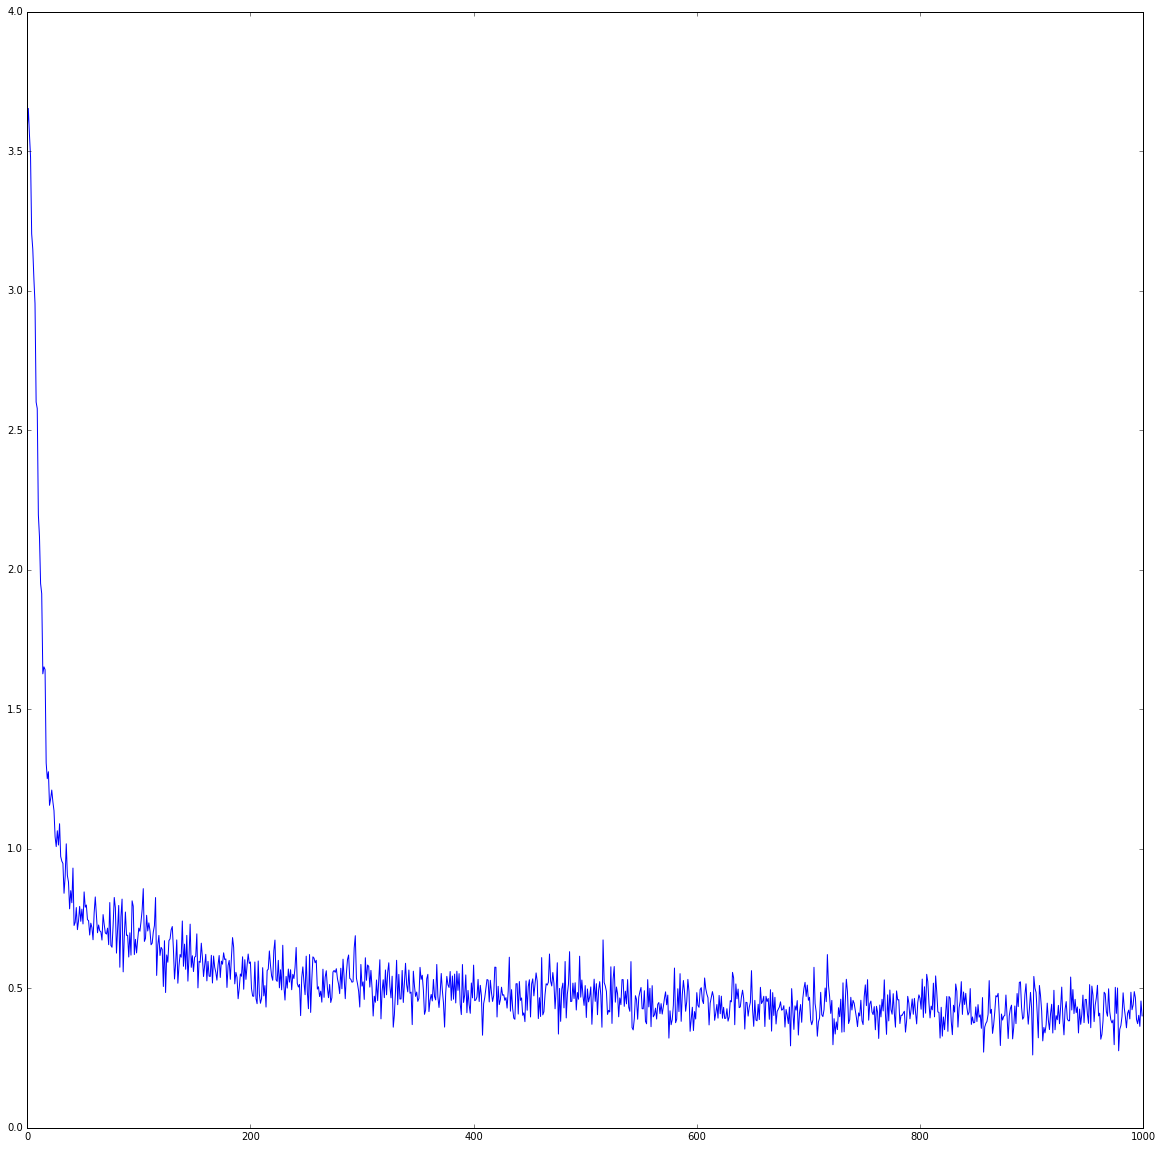

In [3]:
plot(train_loss[0:1000])

In [ ]:
test_iters = 10
accuracy = 0
for it in arange(test_iters):
    solver.test_nets[0].forward()
    accuracy += solver.test_nets[0].blobs['accuracy'].data
accuracy /= test_iters
print 'Accuracy for fine-tuning:', accuracy

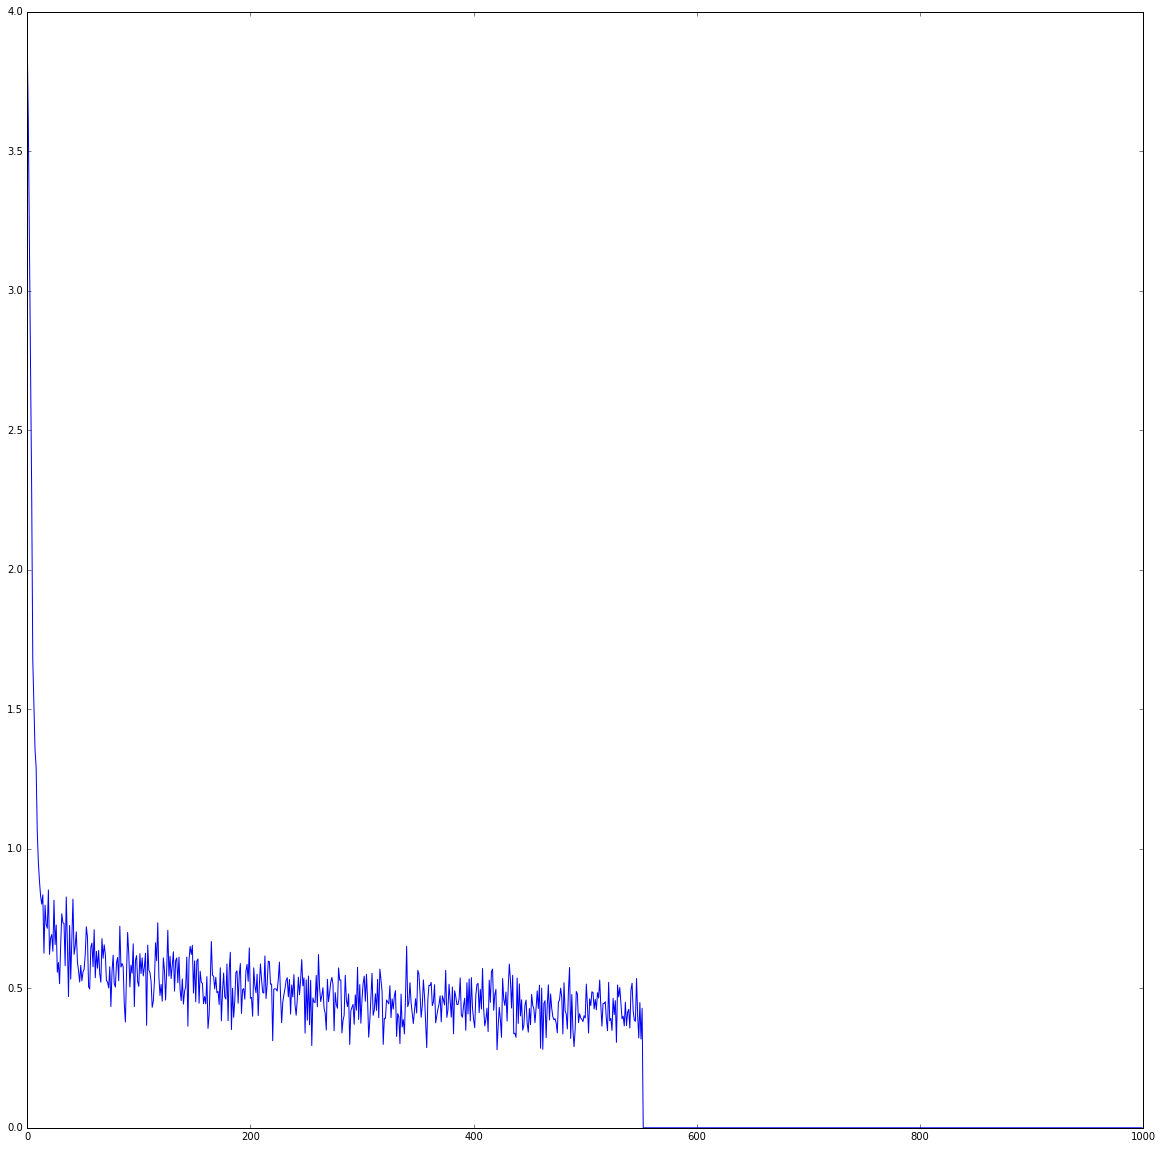

In [2]:
plot(train_loss[0:1000])